# Diagonal Motion Blur Effect on an Image

This code snippet demonstrates how to apply a **diagonal motion blur** effect to an image using a custom convolution kernel in Python with OpenCV. The process involves creating a diagonal kernel and applying it to the image using 2D filtering.

## Code Explanation

1. **Kernel Creation**:
   - A square identity matrix of size `15x15` is created using `np.identity(size)`.
   - The matrix is normalized by dividing by the size (`size = 15`) to ensure the kernel weights sum to 1, preserving the image's intensity.
   - This kernel represents a diagonal motion effect, as it emphasizes pixels along the diagonal direction.

   ```python
   size = 15
   kernel_o = np.identity(size) / size
   print(kernel_o)

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

In [15]:
def imshow(title='', image=None, size=8):
    if image is None:
        print("Error: Input image is None!")
        return
    
    w, h = image.shape[:2]
    plt.figure(figsize=(size * h / w, size))
    
    if len(image.shape) == 3:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    
    plt.title(title, fontsize=12)
    plt.axis('off')
    plt.show()

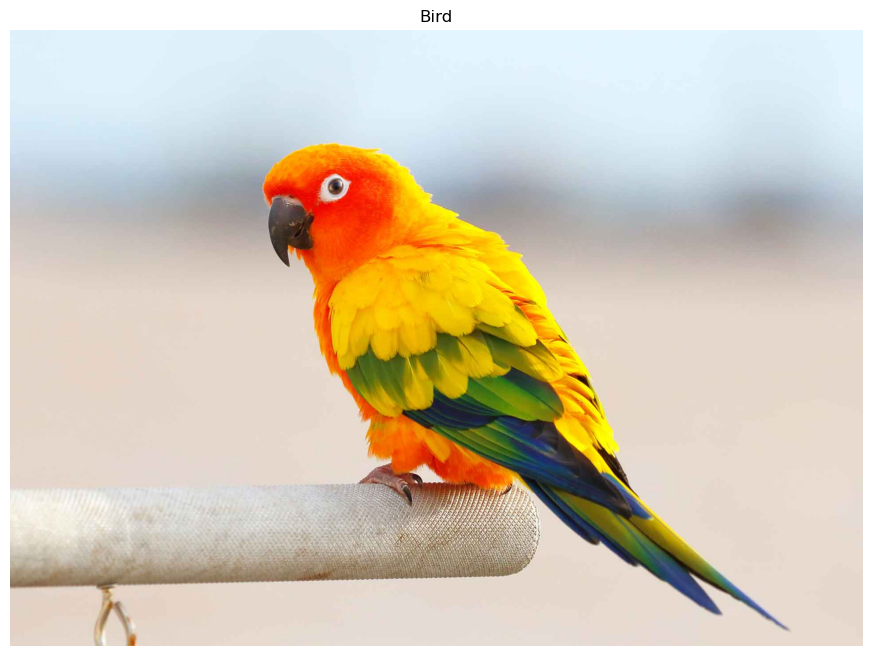

In [16]:
bird = cv.imread('bird.jpeg',-1)
imshow("Bird", bird)

[[0.06666667 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.06666667 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.06666667 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.06666667 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.06666667 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.06666667
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.        

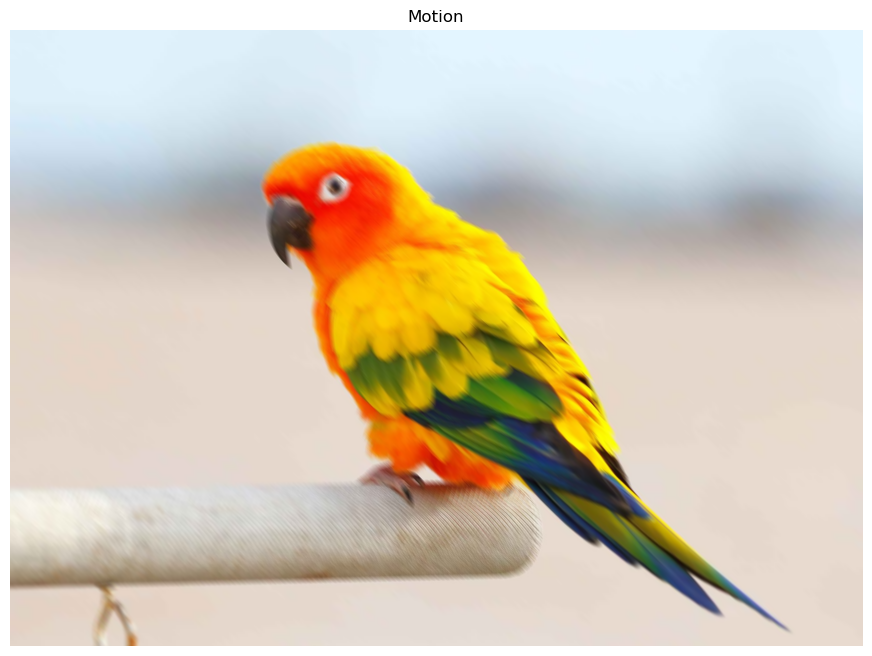

In [17]:
size = 15
kernel_o = np.identity(size)/ size
print(kernel_o)
motion_o = cv.filter2D(bird, -1, kernel_o)
imshow("Motion", motion_o)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Image Enhancement Pipeline</title>
    <style>
      @import url('https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&display=swap');

      body {
        background-color: #e9ecef;
        font-family: 'Roboto', Arial, sans-serif;
      }

      .pipeline-header-en {
        font-family: 'Roboto', Arial, sans-serif;
        direction: ltr;
        background-color: #f8f9fa;
        border: 1px solid #dee2e6;
        border-radius: 12px;
        padding: 25px 30px;
        margin: 20px auto;
        max-width: 850px;
        box-shadow: 0 4px 15px rgba(0, 0, 0, 0.05);
        text-align: center;
        border-left: 7px solid #007bff;
      }

      .pipeline-header-en h1 {
        color: #212529;
        font-size: 26px;
        font-weight: 700;
        margin: 0 0 10px 0;
        padding-bottom: 10px;
        border-bottom: 2px solid #e9ecef;
      }

      .pipeline-header-en .description {
        color: #495057;
        font-size: 16px;
        line-height: 1.7;
        margin-bottom: 25px;
      }

      .pipeline-header-en ul {
        list-style-type: none;
        padding: 0;
        margin: 0;
        text-align: left;
        display: grid;
        grid-template-columns: repeat(auto-fit, minmax(250px, 1fr));
        gap: 10px;
      }

      .pipeline-header-en li {
        background-color: #ffffff;
        padding: 12px 15px;
        border-radius: 8px;
        border: 1px solid #e9ecef;
        display: flex;
        align-items: center;
        font-size: 15px;
        color: #343a40;
        transition: transform 0.2s ease, box-shadow 0.2s ease;
      }
      
      .pipeline-header-en li:hover {
          transform: translateY(-2px);
          box-shadow: 0 4px 8px rgba(0,0,0,0.06);
      }

      .pipeline-header-en li .icon {
        font-size: 22px;
        margin-right: 15px;
        width: 25px;
        text-align: center;
      }

      .explanation-container {
        font-family: 'Roboto', Arial, sans-serif;
        direction: ltr;
        max-width: 850px;
        margin: 20px auto;
        padding: 25px 35px;
        background-color: #ffffff;
        border: 1px solid #dee2e6;
        border-radius: 12px;
        box-shadow: 0 4px 15px rgba(0, 0, 0, 0.05);
      }

      .explanation-container h2 {
        text-align: center;
        color: #212529;
        font-size: 24px;
        border-bottom: 2px solid #e9ecef;
        padding-bottom: 10px;
        margin-top: 0;
        margin-bottom: 25px;
      }

      .explanation-container h3 {
        color: #007bff;
        font-size: 18px;
        font-weight: 700;
        margin-top: 25px;
        margin-bottom: 10px;
      }

      .explanation-container p {
        color: #343a40;
        font-size: 16px;
        line-height: 1.8;
        text-align: left;
      }
      
      .explanation-container strong {
        color: #0056b3;
      }

    </style>
</head>
<body>

    <div class="pipeline-header-en">
      <h1>Advanced Image Enhancement & Super-Resolution Pipeline</h1>
      <p class="description">
        This notebook implements a complete pipeline to enhance quality, correct color, and increase the resolution of images using OpenCV and Deep Learning.
      </p>
      <ul>
        <li><span class="icon">🎨</span>Color Cast Correction</li>
        <li><span class="icon">📈</span>Adaptive Contrast (CLAHE)</li>
        <li><span class="icon">🧼</span>Smart Denoising (Bilateral)</li>
        <li><span class="icon">🔪</span>Edge Sharpening (Laplacian)</li>
        <li><span class="icon">🌈</span>Saturation Boost</li>
        <li><span class="icon">🖼️</span>DNN Super-Resolution</li>
      </ul>
    </div>

    <div class="explanation-container">
        <h2>Algorithm Explanation</h2>
      
        <h3>1. Color Cast Correction</h3>
        <p>The process begins by fixing any unnatural color tints in the image. It uses the <strong>"Gray World"</strong> algorithm, which assumes the average color of a scene should be neutral gray. It calculates the average of the red, green, and blue channels and then scales them to be equal, effectively neutralizing color casts like excessive yellow or blue hues.</p>
      
        <h3>2. Color Space Conversion (BGR to HSV)</h3>
        <p>To edit color and brightness independently, the image is converted from the BGR (Blue, Green, Red) color space to <strong>HSV</strong> (Hue, Saturation, Value). This separation allows for targeted adjustments:
            <ul>
                <li><strong>H</strong>ue: The pure color (e.g., red, green).</li>
                <li><strong>S</strong>aturation: The intensity or richness of the color.</li>
                <li><strong>V</strong>alue: The brightness or luminance of the color.</li>
            </ul>
        </p>
      
        <h3>3. Luminance Enhancement (V-Channel)</h3>
        <p>This stage focuses entirely on the image's structure and detail by processing the <strong>V (Value)</strong> channel. It involves a sequence of three operations:</p>
        <ol>
            <li><strong>Adaptive Contrast (CLAHE):</strong> Instead of brightening the whole image uniformly, CLAHE improves contrast in small, local regions. This reveals details in both shadows and highlights without making the image look washed out.</li>
            <li><strong>Smart Denoising (Bilateral Filter):</strong> This filter removes unwanted noise (graininess) while being smart enough to preserve important edges. This is crucial for preventing a blurry result.</li>
            <li><strong>Edge Sharpening (Laplacian Filter):</strong> The pipeline identifies all the edges in the image and makes them slightly more pronounced. This increases the perceived sharpness and clarity of the final image.</li>
        </ol>
      
        <h3>4. Color Enhancement (S-Channel)</h3>
        <p>This stage makes the colors more vibrant by processing the <strong>S (Saturation)</strong> channel. First, a Bilateral Filter is used again to smooth out any splotchy or inconsistent color patches. Then, the intensity of every color is uniformly increased, making the image look richer and more vivid.</p>
      
        <h3>5. Recomposition and Final Conversion</h3>
        <p>The individually processed channels—<strong>H</strong> (which was left untouched), the enhanced <strong>S</strong>, and the enhanced <strong>V</strong>—are merged back into a single HSV image. This image is then converted back to the standard BGR color space so it can be saved or displayed correctly.</p>
      
        <h3>6. DNN Super-Resolution</h3>
        <p>As the final step, the enhanced, color-corrected image is fed into a pre-trained <strong>Deep Neural Network (DNN)</strong> model like EDSR. This model intelligently increases the image's resolution (e.g., 4x). Instead of simply stretching the image, it generates new, plausible pixels based on its training, resulting in a larger and more detailed final photograph.</p>
    </div>

</body>
</html>

In [18]:
class ImageEnhancementPipeline:
    def __init__(self, sr_model_path: str, model_name: str = 'edsr', scale: int = 4):
        self.sr = cv.dnn_superres.DnnSuperResImpl_create()
        self.scale = scale
        try:
            self.sr.readModel(sr_model_path)
            self.sr.setModel(model_name, scale)
        except cv.error as e:
            self.sr = None
            raise IOError(f"Failed to load Super-Resolution model from '{sr_model_path}'. Ensure the file exists and is a valid model.") from e

    def _correct_color_cast(self, image_bgr):
        b, g, r = cv.split(image_bgr)
        r_avg, g_avg, b_avg = cv.mean(r)[0], cv.mean(g)[0], cv.mean(b)[0]
        
        if r_avg == 0 or g_avg == 0 or b_avg == 0:
            return image_bgr
            
        avg_all = (r_avg + g_avg + b_avg) / 3.0
        r_scale, g_scale, b_scale = avg_all / r_avg, avg_all / g_avg, avg_all / b_avg
        
        r = np.clip(cv.multiply(r, r_scale), 0, 255).astype('uint8')
        g = np.clip(cv.multiply(g, g_scale), 0, 255).astype('uint8')
        b = np.clip(cv.multiply(b, b_scale), 0, 255).astype('uint8')
        
        return cv.merge([b, g, r])

    def _enhance_luminance(self, v_channel):
        clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        v_clahe = clahe.apply(v_channel)
        
        v_denoised = cv.bilateralFilter(v_clahe, 9, 75, 75)
        
        laplacian = cv.Laplacian(v_denoised, cv.CV_64F)
        v_sharpened = cv.subtract(v_denoised, cv.convertScaleAbs(laplacian))
        
        return v_sharpened

    def _enhance_saturation(self, s_channel):
        s_denoised = cv.bilateralFilter(s_channel, 9, 75, 75)
        s_boosted = np.clip(s_denoised * 1.2, 0, 255).astype('uint8')
        return s_boosted

    def _super_resolve(self, image_bgr):
        if self.sr:
            return self.sr.upsample(image_bgr)
        return image_bgr

    def process(self, image_bgr):
        corrected_color = self._correct_color_cast(image_bgr)
        
        hsv = cv.cvtColor(corrected_color, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)
        
        v_final = self._enhance_luminance(v)
        s_final = self._enhance_saturation(s)
        
        final_hsv = cv.merge([h, s_final, v_final])
        final_image = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
        
        if self.scale != 1:
            final_image = self._super_resolve(final_image)
        
        return final_image

In [19]:
if __name__ == '__main__':
    input_image_path = 'underexposedImage.jpg'
    output_image_path = 'result.png'
    sr_model_file = 'EDSR_x4.pb'
    upscale_factor = 1
    
    # --- Execution ---
    try:
        pipeline = ImageEnhancementPipeline(sr_model_path=sr_model_file, scale=upscale_factor)
        
        image = cv.imread(input_image_path)
        if image is None:
            raise FileNotFoundError(f"Input image not found at: {input_image_path}")
            
        print("Processing started...")
        processed_image = pipeline.process(image)
        
        cv.imwrite(output_image_path, processed_image)
        
        print(f"Processing complete. Image saved to: {output_image_path}")
        print(f"Original dimensions: {image.shape}")
        print(f"Final dimensions:    {processed_image.shape}")

    except (IOError, FileNotFoundError, cv.error) as e:
        print(f"An error occurred: {e}", file=sys.stderr)
        sys.exit(1)

Processing started...
Processing complete. Image saved to: result.png
Original dimensions: (599, 900, 3)
Final dimensions:    (599, 900, 3)
